In [1]:
# Load modules and set-up test problem
import sys
# sys.path.append("..")

import numpy as np
from numpy import array, zeros, ones, exp
import matplotlib.pyplot as plt

from cuqi.model import LinearModel
from cuqi.distribution import Gaussian, JointDistribution, Uniform, Gamma
from cuqi.implicitprior import RegularizedGaussian,RegularizedUnboundedUniform, ConstrainedGaussian
from cuqi.experimental.mcmc import RegularizedLinearRTO, LinearRTO, Conjugate, HybridGibbs, MH
from cuqi.geometry import StepExpansion, MappedGeometry, Discrete

min_val = -2
max_val = 4

In [ ]:
# Define model and data

np.random.seed(88)

x_true = array([1.5, 1.5])
A = LinearModel(array([[1.0, 1.0]]))
y_data = np.array([3.0338])

# Gaussian prior

In [3]:
num_samples = 200
num_burnin = 10
thining = 2

x = Gaussian(zeros(2), 10)
y = Gaussian(A@x, 0.1)

posterior = JointDistribution(x,y)(y = y_data)

np.random.seed(88)
sampler = LinearRTO(posterior, maxit = 500)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:00<00:00, 631.08it/s, acc rate: 100.00%]


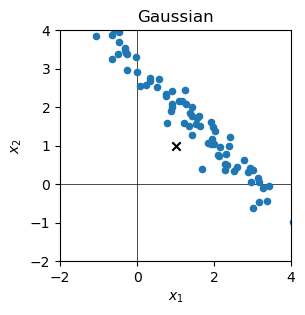

In [4]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Gaussian")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/gaussian.pdf", bbox_inches = "tight")

# Bounded uniform prior

In [5]:
num_samples = 10000
num_burnin = 100
thining = 100

x = Uniform(zeros(2), 2*ones(2))
y = Gaussian(A@x, 0.1)

posterior = JointDistribution(x,y)(y = y_data)

np.random.seed(88)
sampler = MH(posterior, scale = 0.5)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 10100/10100 [00:20<00:00, 491.34it/s, acc rate: 31.48%]


array([[<Axes: title={'center': 'x0'}>, <Axes: title={'center': 'x0'}>],
       [<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x1'}>]],
      dtype=object)

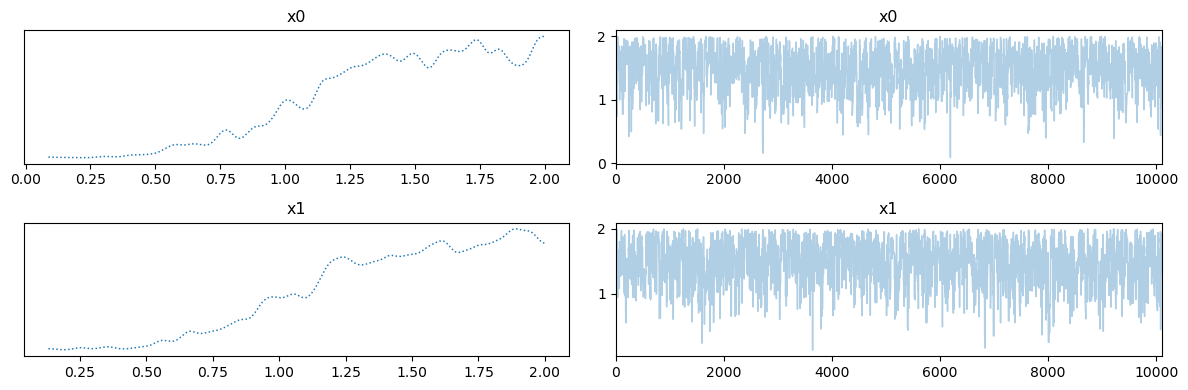

In [6]:
sampler.get_samples().plot_trace()

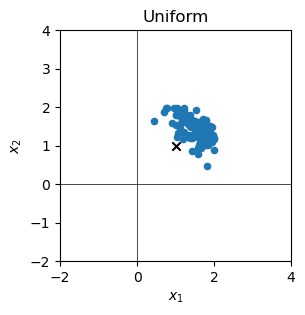

In [7]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Uniform")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/uniform.pdf", bbox_inches = "tight")

# Nonnegativity constrained RLRTO

In [8]:
num_samples = 200
num_burnin = 10
thining = 2

x = ConstrainedGaussian(np.zeros(2), 10, constraint="nonnegativity")
y = Gaussian(A@x, 0.1)

posterior = JointDistribution(x,y)(y = y_data)

np.random.seed(88)
sampler = RegularizedLinearRTO(posterior, maxit = 500)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:11<00:00, 17.79it/s, acc rate: 100.00%]


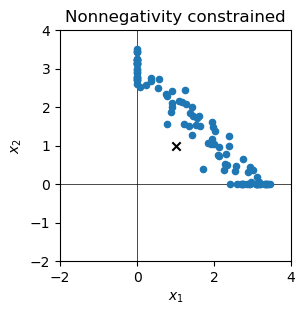

In [9]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Nonnegativity constrained")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/nonnegative.pdf", bbox_inches = "tight")

# TV regularized RLRTO

In [10]:
num_samples = 200
num_burnin = 10
thining = 2

x = RegularizedGaussian(np.zeros(2), 10, regularization="TV", strength = 0.2, geometry = A.domain_geometry)
y = Gaussian(A@x, 0.1)

posterior = JointDistribution(x,y)(y = y_data)

np.random.seed(88)
sampler = RegularizedLinearRTO(posterior, maxit = 500, penalty_parameter = 1000)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:58<00:00,  3.56it/s, acc rate: 100.00%]


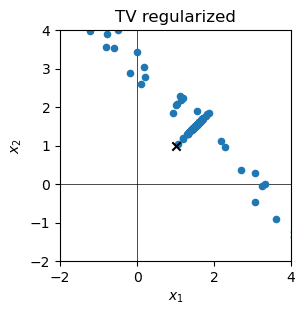

In [11]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples[0], samples[1], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("TV regularized")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/TV.pdf", bbox_inches = "tight")

# Step expansion

In [12]:
num_samples = 200
num_burnin = 10
thining = 2

geom = StepExpansion([0,1], 1)
A_step = LinearModel(array([[1.0, 1.0]]), domain_geometry=geom)

x = Gaussian(zeros(1),  1)
y = Gaussian(A_step(x), 0.1)

joint = JointDistribution(x,y)
posterior = joint(y = y_data)

np.random.seed(88)
sampler = LinearRTO(posterior)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 210/210 [00:00<00:00, 253.59it/s, acc rate: 100.00%]


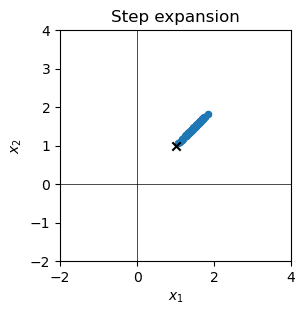

In [13]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(samples, samples, s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Step expansion")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/step.pdf", bbox_inches = "tight")

# Exponential transformation/log normal

In [14]:
num_samples = 10000
num_burnin = 100
thining = 100

geom = MappedGeometry(Discrete(2), lambda x: exp(x))
A_exp = LinearModel(array([[1.0, 1.0]]), domain_geometry=geom)

x = Gaussian(zeros(2),  1)
y = Gaussian(A_exp(x), 0.1)

joint = JointDistribution(x,y)
posterior = joint(y = y_data)

np.random.seed(88)
sampler = MH(posterior, scale = 0.5)
sampler.sample(num_samples + num_burnin)
samples = sampler.get_samples().burnthin(num_burnin, thining).samples

Sample: 100%|██████████| 10100/10100 [00:20<00:00, 486.02it/s, acc rate: 29.32%]


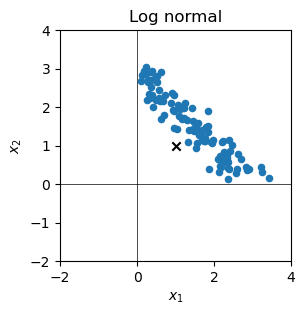

In [15]:
plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(geom.par2fun(samples[0]), geom.par2fun(samples[1]), s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Log normal")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/lognormal.pdf", bbox_inches = "tight")

# Hierarchical

In [16]:
num_samples = 1000
num_burnin = 10
thining = 5

d = Gamma(1, 1e-4)
l = Gamma(1, 1e-4)

x = RegularizedUnboundedUniform(regularization="TV", strength = lambda d : d,
                                geometry = A.domain_geometry)
y = Gaussian(A@x, prec = lambda l : l)
posterior = JointDistribution(d,l,x,y)(y = y_data)

np.random.seed(88)
sampling_strategy = {
            'd': Conjugate(),
            'l': Conjugate(),
            'x': RegularizedLinearRTO(maxit = 100, penalty_parameter = 1000)
            }

sampler = HybridGibbs(posterior, sampling_strategy)
sampler.sample(num_samples + num_burnin)
gibbs_samples_x = sampler.get_samples()['x'].burnthin(num_burnin, thining).samples
gibbs_samples_d = sampler.get_samples()['d'].burnthin(num_burnin, thining).samples
gibbs_samples_l = sampler.get_samples()['l'].burnthin(num_burnin, thining).samples

c:\Users\jmev\Documents\git_repos\CUQIpy\cuqi\distribution\_gaussian.py:681: RuntimeWarning: divide by zero encountered in log
  logdet = np.sum(-np.log(precision))
Sample:   0%|          | 0/1010 [00:00<?, ?it/s]c:\Users\jmev\Documents\git_repos\CUQIpy\cuqi\solver\_solver.py:347: RuntimeWarning: invalid value encountered in scalar divide
  p = s + (gamma/gamma1)*p
Sample: 100%|██████████| 1010/1010 [01:09<00:00, 14.47it/s]


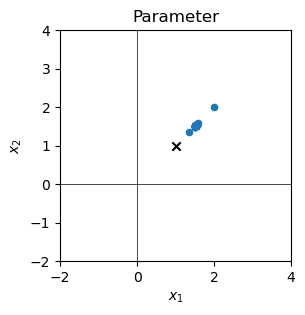

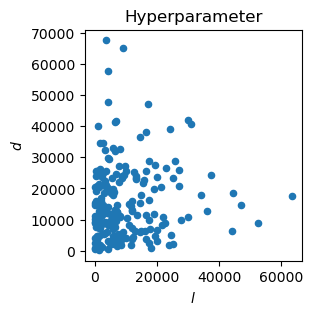

In [17]:

plt.figure(figsize = (3,3))
plt.gca().axhline(y=0, color='k', lw = 0.5, zorder = 1)
plt.gca().axvline(x=0, color='k', lw = 0.5, zorder = 1)

plt.scatter(gibbs_samples_x[0, :], gibbs_samples_x[1, :], s = 20, zorder = 2)
plt.scatter(x_true[0], x_true[1], color = 'k', marker='x', zorder = 3)
plt.title("Parameter")
plt.xlim((min_val, max_val))
plt.ylim((min_val, max_val))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/hierarchical_parameter.pdf", bbox_inches = "tight")

plt.figure(figsize = (3,3))
plt.scatter(gibbs_samples_l, gibbs_samples_d, s = 20, zorder = 2)

plt.title("Hyperparameter")
plt.xlabel("$l$")
plt.ylabel("$d$")
plt.gca().set_aspect("equal")

plt.savefig("figures/simplest_linear/hierarchical_hyperparameter.pdf", bbox_inches = "tight")